First 5 rows of the dataset:
    Outlook  Temperature  Humidity  Windy Play
0     Sunny           98        90  False   No
1  Overcast           88        78  False  Yes
2     Sunny           74        75   True  Yes
3     Sunny           67        64  False  Yes
4  Overcast           80        94   True  Yes

Checking for missing values:
Outlook        0
Temperature    0
Humidity       0
Windy          0
Play           0
dtype: int64

Model Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.47      0.56        34
           1       0.77      0.89      0.83        66

    accuracy                           0.75       100
   macro avg       0.73      0.68      0.69       100
weighted avg       0.74      0.75      0.74       100



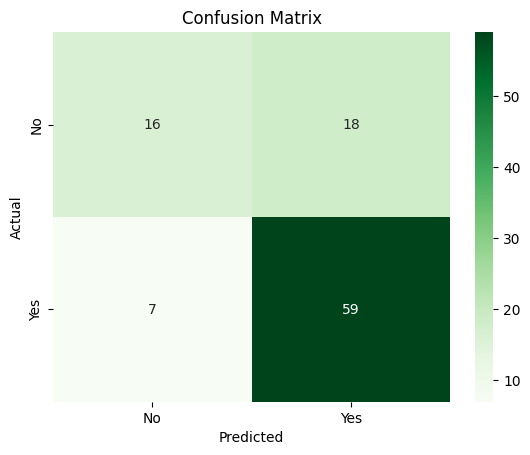


Sample Predictions:
      Outlook  Temperature  Humidity     Windy Actual Predicted
361 -0.007244     0.735456 -1.307949  0.937923     No       Yes
73  -0.007244     0.391945 -0.803144  0.937923     No       Yes
374 -1.214639     0.134313 -0.803144 -1.066186    Yes       Yes
155  1.200151     1.508354  0.038197 -1.066186    Yes       Yes
104 -0.007244     1.594232  1.384343 -1.066186    Yes       Yes


In [ ]:
# Weather Prediction Using Naive Bayes Classifier

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Data Collection
# Load dataset from uploaded file
file_path = 'large_weather_dataset.csv'
df = pd.read_csv(file_path)
print("First 5 rows of the dataset:")
print(df.head())

# Step 2: Data Preprocessing
print("\nChecking for missing values:")
print(df.isnull().sum())  # Check for missing values

# Drop rows with missing values for simplicity
df.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object', 'bool']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Normalize numerical features
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('Play')  # Exclude target column if present
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Step 3: Model Implementation
# Define features and target variable
X = df.drop('Play', axis=1)
y = df['Play']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Step 4: Model Evaluation
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_names = label_encoders['Play'].classes_ if 'Play' in label_encoders else ['No', 'Yes']
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 5: Prediction
# Show predictions for test set with actual vs predicted
predictions_df = X_test.copy()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_pred
if 'Play' in label_encoders:
    predictions_df['Actual'] = label_encoders['Play'].inverse_transform(y_test)
    predictions_df['Predicted'] = label_encoders['Play'].inverse_transform(y_pred)
print("\nSample Predictions:")
print(predictions_df.head())
